<a href="https://colab.research.google.com/github/vkatari90/Practical-Data-Analytics-Solutions/blob/week1/Assignment_2_VenkateshBabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
# Display the first few rows and check data types
print(df.head())
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
# Handle missing values (example using median)
median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)

In [6]:
# Verify if missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values after handling:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
print(df.describe())


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

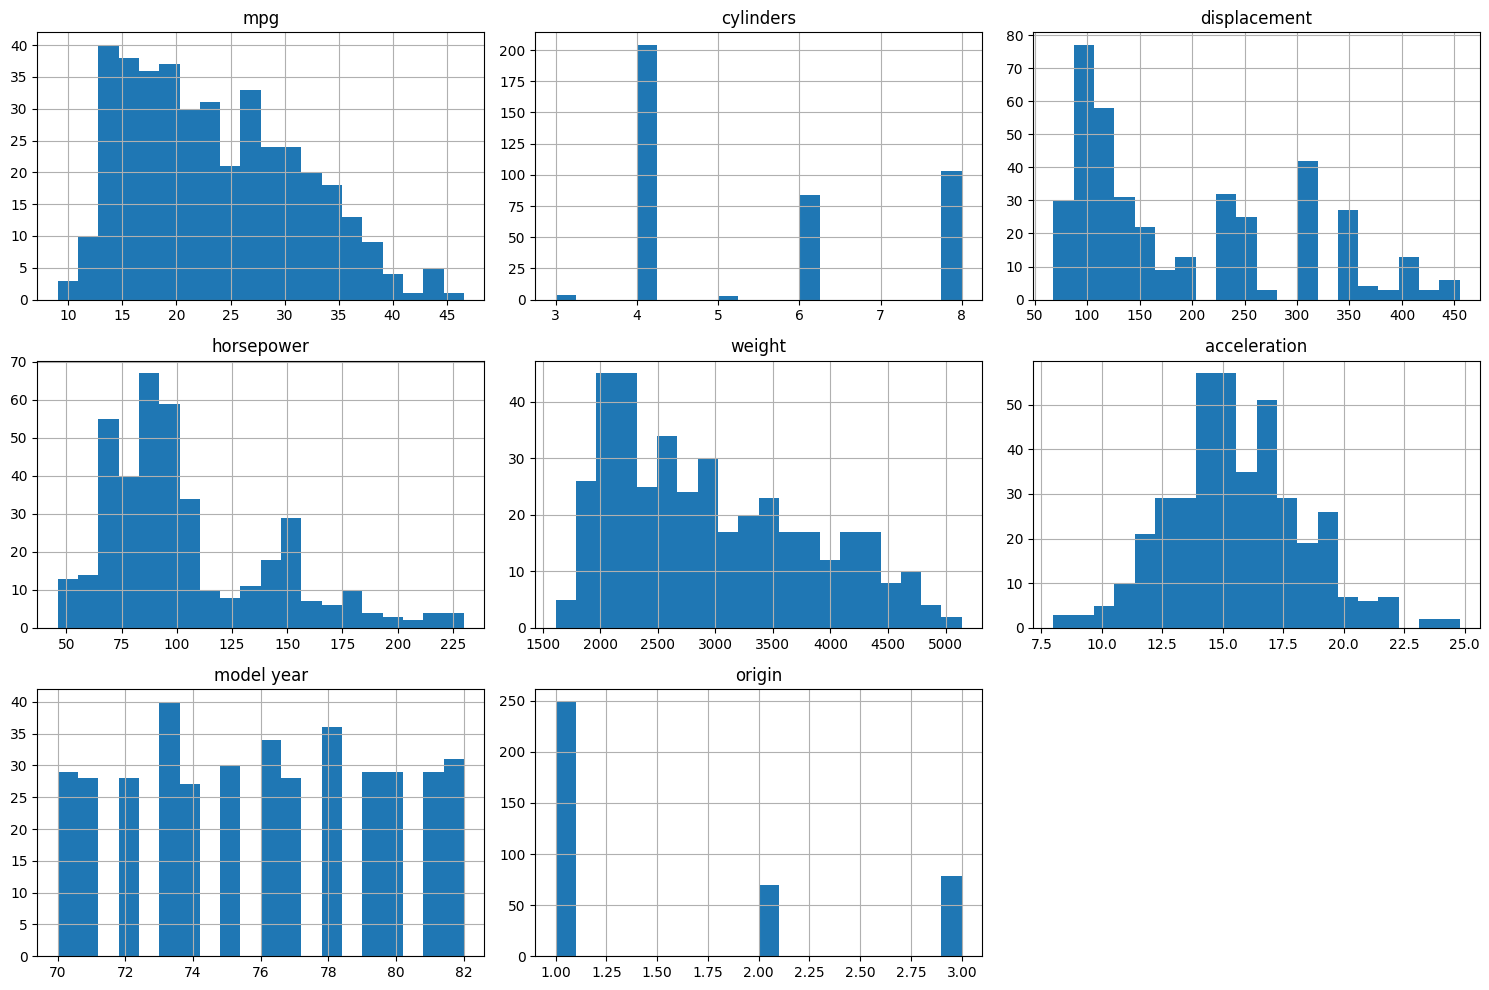

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]


In [10]:
corr_matrix = df_numeric.corr()


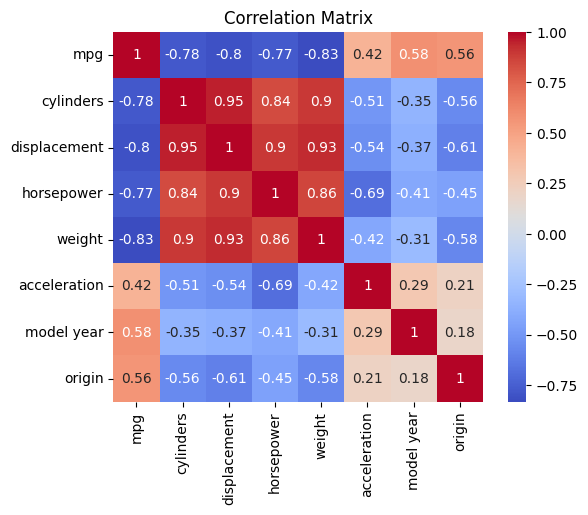

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


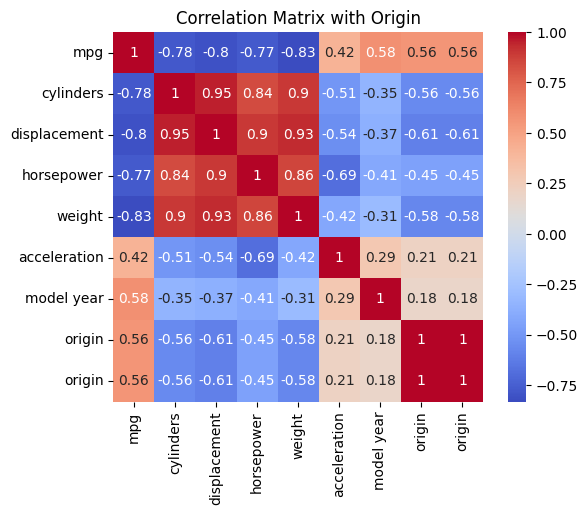

In [12]:
# Assuming 'origin' is already converted to dummy variables
df_numeric_with_origin = pd.concat([df_numeric, df['origin']], axis=1)
corr_matrix_with_origin = df_numeric_with_origin.corr()

# Visualize the correlation matrix with 'origin'
sns.heatmap(corr_matrix_with_origin, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix with Origin')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['displacement', 'horsepower', 'weight', 'acceleration']] = scaler.fit_transform(df[['displacement', 'horsepower', 'weight', 'acceleration']])


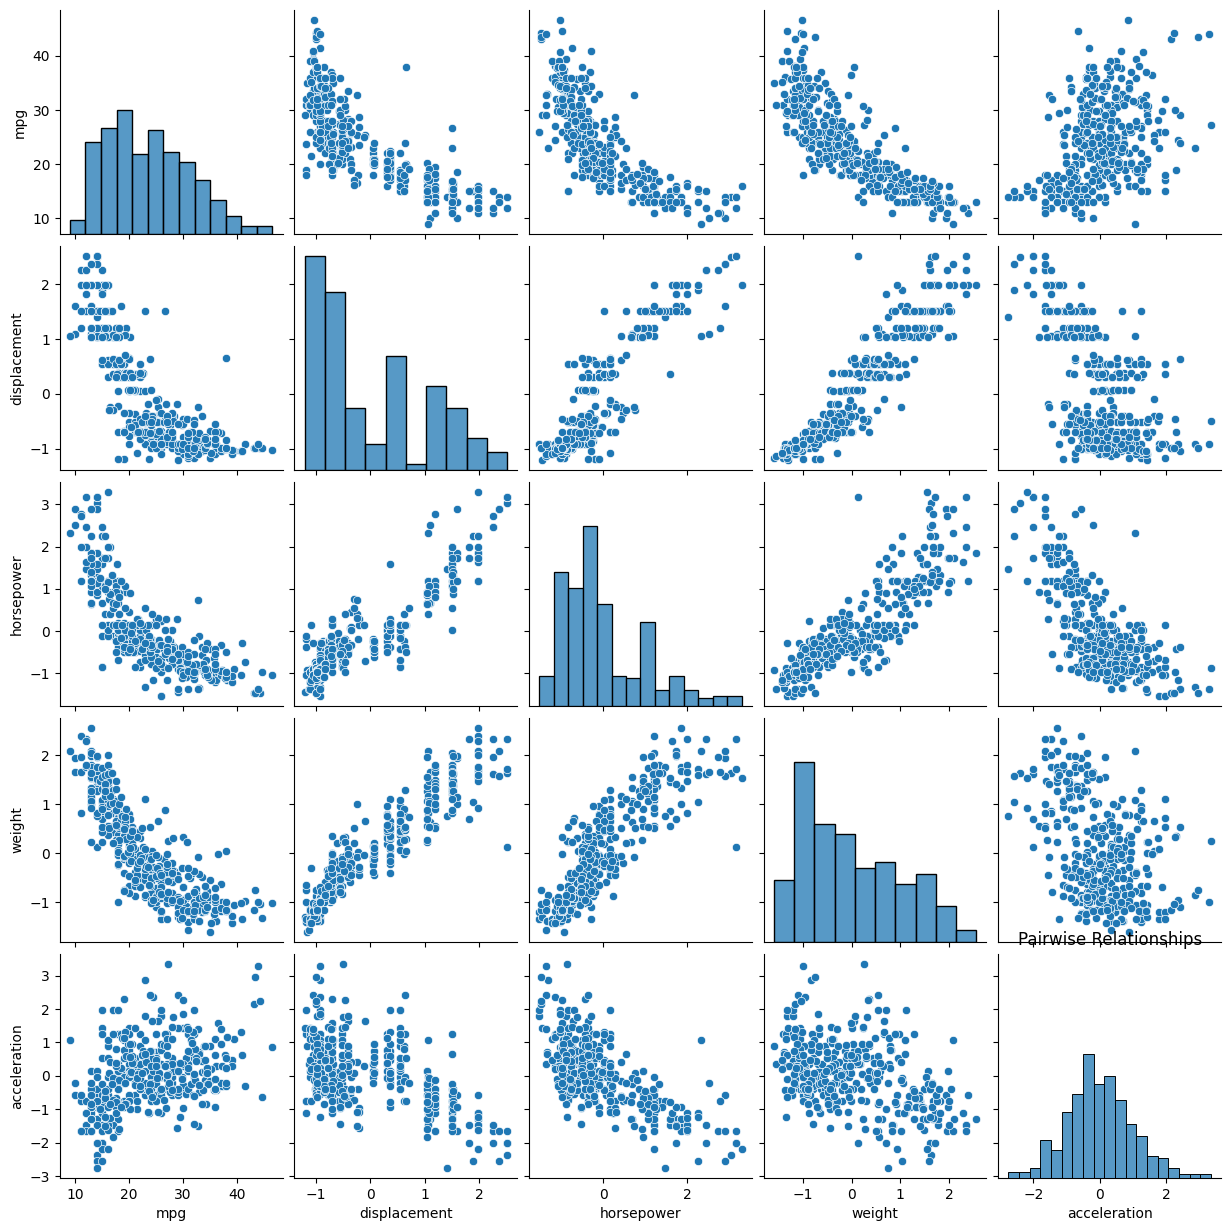

In [14]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.title('Pairwise Relationships')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


NameError: name 'X' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns to identify distributions
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
import numpy as np


In [ ]:
# Identify columns by distribution type
numeric_symmetric_cols = ['displacement', 'acceleration']
numeric_skewed_cols = ['horsepower', 'weight']
categorical_cols = ['cylinders', 'model year', 'origin']

In [ ]:
# Pipeline for numeric and symmetric columns
numeric_symmetric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
# Pipeline for numeric and skewed columns
numeric_skewed_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

In [ ]:
# Pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine all pipelines using ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_symmetric', numeric_symmetric_transformer, numeric_symmetric_cols),
        ('numeric_skewed', numeric_skewed_transformer, numeric_skewed_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Print the shape of the processed data
print(f"Shape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed testing data: {X_test_processed.shape}")